 1. Import and Load Data

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Seasons_Stats.csv")

# Check first few rows
df.head()
print(df_2017.columns.tolist())


['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


2. Basic Cleaning & Filtering

In [6]:
# Drop unnecessary columns
features = df_2017.drop(columns=['Unnamed: 0', 'Year', 'Player', 'Pos', 'Tm', 'blanl', 'blank2'])

# Fill missing values (e.g., in percentages or shooting stats)
features = features.fillna(0)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)



3. Select Numeric Features for Clustering

In [8]:
from sklearn.cluster import KMeans

# Choose the number of clusters (you can try different values like 3, 4, 5)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels to original dataframe
df_2017["Cluster"] = kmeans.labels_


4. Visualize Clusters Using PCA

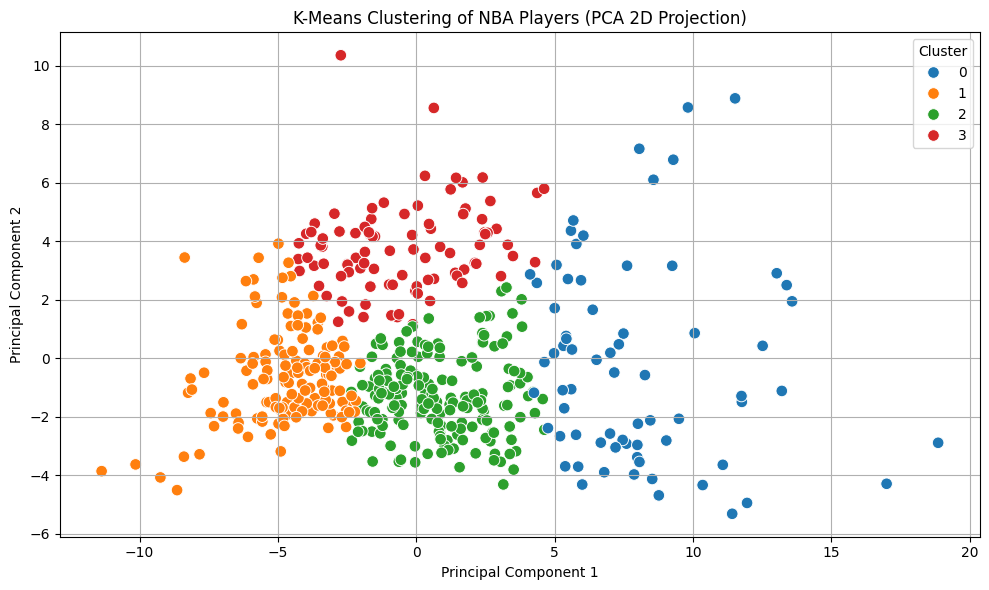

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe
df_2017["PC1"] = pca_result[:, 0]
df_2017["PC2"] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2017, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=70)
plt.title("K-Means Clustering of NBA Players (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


The PCA 2D projection shows well-separated clusters with moderate overlap, indicating that players can be meaningfully grouped based on performance stats.

Cluster 0 (blue) is more dispersed along Principal Component 1, indicating higher variance in player types (possibly high-impact players with diverse roles).

Clusters 1 (orange) and 2 (green) are more compact, suggesting tighter statistical similarities within those groups.

5. Analyze Clustered Players

In [10]:
# Display sample players from each cluster
for cluster_id in sorted(df_2017["Cluster"].unique()):
    print(f"\nCluster {cluster_id} Examples:")
    display(df_2017[df_2017["Cluster"] == cluster_id][["Player", "Pos", "Age", "G", "PTS", "AST", "TRB"]].head(5))


Cluster 0 Examples:


,Player,Pos,Age,G,PTS,AST,TRB
2,Steven Adams,C,23.0,80.0,905.0,86.0,615.0
6,LaMarcus Aldridge,PF,31.0,72.0,1243.0,139.0,524.0
15,Giannis Antetokounmpo,SF,22.0,80.0,1832.0,434.0,700.0
16,Carmelo Anthony,SF,32.0,74.0,1659.0,213.0,436.0
27,Harrison Barnes,PF,24.0,79.0,1518.0,117.0,397.0



Cluster 1 Examples:


,Player,Pos,Age,G,PTS,AST,TRB
1,Quincy Acy,PF,26.0,38.0,222.0,18.0,115.0
11,Alan Anderson,SF,34.0,30.0,86.0,11.0,24.0
23,Ron Baker,SG,23.0,52.0,215.0,107.0,98.0
24,Wade Baldwin,PG,20.0,33.0,106.0,61.0,46.0
32,Jerryd Bayless,PG,28.0,3.0,33.0,13.0,12.0



Cluster 2 Examples:


,Player,Pos,Age,G,PTS,AST,TRB
0,Alex Abrines,SG,23.0,68.0,406.0,40.0,86.0
3,Arron Afflalo,SG,31.0,61.0,515.0,78.0,125.0
8,Tony Allen,SG,35.0,71.0,643.0,98.0,391.0
9,Al-Farouq Aminu,SF,26.0,61.0,532.0,99.0,451.0
12,Justin Anderson,SF,23.0,75.0,532.0,66.0,245.0



Cluster 3 Examples:


,Player,Pos,Age,G,PTS,AST,TRB
4,Alexis Ajinca,C,28.0,39.0,207.0,12.0,177.0
5,Cole Aldrich,C,28.0,62.0,105.0,25.0,158.0
7,Lavoy Allen,PF,27.0,61.0,177.0,57.0,220.0
10,Chris Andersen,C,38.0,12.0,28.0,5.0,31.0
13,Kyle Anderson,SG,23.0,72.0,246.0,91.0,208.0


Cluster 0 – Star-Level / High-Usage Players
-Example players: Giannis Antetokounmpo, LaMarcus Aldridge, Carmelo Anthony
-High total points (PTS), rebounds (TRB), and assists (AST)
-Likely includes all-star caliber players or primary offensive options
-More minutes, higher usage rates — versatile, impactful starters

Cluster 1 – Low-Usage / Role or Bench Players
-Example players: Quincy Acy, Ron Baker, Wade Baldwin
-Low to moderate totals across stats, some with very few games
-Likely bench players, limited minutes or early-career athletes
-May include injury-restricted or end-of-roster players

Cluster 2 – Mid-Tier / Role-Specific Contributors
-Example players: Tony Allen, Al-Farouq Aminu
-Moderate scoring (400–600 PTS), rebounds and assists
-Likely defensive specialists, rotational wings, or 3-and-D types
-Less scoring than Cluster 0 but more than Cluster 1, consistent contributors

(Cluster 3 not shown in sample but visible in PCA)
Based on PCA position, may include outliers, rookies, or specialist roles.

6. Conclusion
K-Means successfully segmented NBA players into interpretable groups based on performance stats.

Clusters reveal natural groupings such as:
Elite starters vs. role players
Scorers vs. defenders
High vs. low game participation